In [85]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [86]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [87]:
path_train_data = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist_training_data.mat"
path_train_label = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist_training_label.mat"
path_test_data = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist_test_data.mat"
path_test_label = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist_test_label.mat"

In [88]:
train_data_mat = loadmat(path_train_data)
train_data = train_data_mat['training_data']

train_label_mat = loadmat(path_train_label)
train_label = train_label_mat['training_label']

test_data_mat = loadmat(path_test_data)
test_data = test_data_mat['test_data']

test_label_mat = loadmat(path_test_label)
test_label = test_label_mat['test_label']

In [89]:
train_data = train_data.reshape(train_data.shape[0], 784)
test_data = test_data.reshape(test_data.shape[0], 784)
# train_label = train_label.T
# test_label = test_label.T

In [90]:
train_label.shape

(50000, 1)

In [91]:
train_data.shape

(50000, 784)

In [92]:
# from sklearn.model_selection import train_test_split
# train_data, _, train_label, _ = train_test_split(train_data, train_label, test_size=0.6)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [94]:
X_train.shape

(50000, 784)

In [95]:
train_label.shape

(50000, 1)

In [96]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(train_label).toarray()
y_test = ohe.fit_transform(test_label).toarray()

In [97]:
y_train.shape

(50000, 10)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.8)

In [99]:
X_train.shape

(10000, 784)

In [103]:
lam = tf.keras.regularizers.l2(l=0)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=784, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(128, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.LeakyReLU(0.1),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.1),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [104]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [105]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/20
10000/10000 [==============================] - 29s 3ms/step - loss: 1.8785 - accuracy: 0.4164 - val_loss: 0.8660 - val_accuracy: 0.7787
Epoch 2/20
10000/10000 [==============================] - 30s 3ms/step - loss: 0.7586 - accuracy: 0.7878 - val_loss: 0.6305 - val_accuracy: 0.8448
Epoch 3/20
10000/10000 [==============================] - 41s 4ms/step - loss: 0.5448 - accuracy: 0.8534 - val_loss: 0.5330 - val_accuracy: 0.8697
Epoch 4/20
10000/10000 [==============================] - 39s 4ms/step - loss: 0.4525 - accuracy: 0.8768 - val_loss: 0.5005 - val_accuracy: 0.8829
Epoch 5/20
10000/10000 [==============================] - 39s 4ms/step - loss: 0.3989 - accuracy: 0.8903 - val_loss: 0.4618 - val_accuracy: 0.8900
Epoch 6/20
10000/10000 [==============================] - 39s 4ms/step - loss: 0.3676 - accuracy: 0.8963 - val_loss: 0.4475 - val_accuracy: 0.8960
Epoch 7/20
10000/10000 [==============================] - 39s 4ms/step - loss: 0.3360 - accuracy: 0.9057 - val_loss: 0

In [103]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 95.37


<AxesSubplot:>

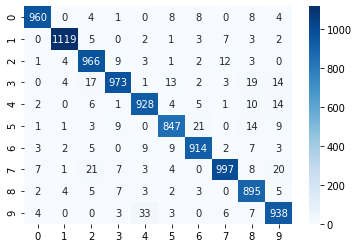

In [105]:
sns.heatmap(confusion_matrix(pred, test), annot=True, fmt='g', cmap='Blues')

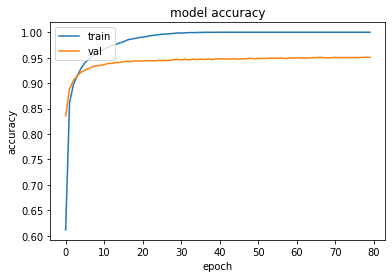

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.xticks([i for i in range(25)])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

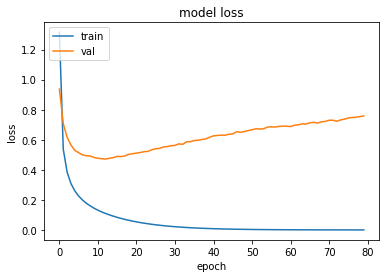

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.xticks([i for i in range(25)])
plt.legend(['train', 'val'], loc='upper left')
plt.show()